## GRUPO 8 

#### *Integrantes:* 

1. Gianfranco Soria (20163509)
3. Andrea Clavo (20176040)
4. Sandra Martínez (20173026)

_____
## Question 1: Orthogonal Learning
_____

1. Replicate Simulation Design 1 three times using different numbers of trials. So you have to use:

- The equation of Y for the three cases now is: Y = 5*D + beta*X + rnorm(n)
- B = 50 , B = 100, B = 1000.
- Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
- Why does this happen? Give an econometric explanation of this.
- Label your axes and legends correctly your figures.

_____
## Question 2: Double Lasso - Testing the Convergence Hypothesis
_____

1. Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

2. Replicate the results using the next approaches:
- OLS
- Double LASSO using cross Validation (GLMNET in R and Sklearn in Python )
- Double Lasso using theoretical Lambda (HDM package both in R and Python)
- Double Lasso using method="partialling out", this is a direct way to get results from the HDM package, check the Python script for an example, and also you have to read the documentation for more details.
- Plot the main coefficient and its confidence interval of the convergence hypothesis from these 4 cases in one figure.

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [52]:
library(hdm)
library(xtable)

In [53]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "C:/Users/PC-1/Documents/GitHub/ECO224/Labs/data/GrowthData.RData")

In [54]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

The following objects are masked from growth (pos = 6):

    bmp1l, ex1, fert1, fert65, freeop, freetar, gde1, gdpsh465,
    geerec1, geetot1, govsh41, govwb1, gpop1, gvxdxe41, h65, hf65,
    high65, highc65, highcf65, highcm65, highf65, highm65, hm65,
    human65, humanf65, humanm65, hyr65, hyrf65, hyrm65, im1, intercept,
    invsh41, lifee065, mort1, mort65, no65, nof65, nom65, Outcome, p65,
    pf65, pinstab1, pm65, pop1565, pop65, pop6565, s65, sec65, secc65,
    seccf65, seccm65, secf65, secm65, sf65, sm65, syr65, syrf65,
    syrm65, teapri65, teasec65, tot1, worker65, xr65



[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

We determine the dimension of our data set.

In [55]:
dim(growth)

[1] 90 63

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

## METHOD 1: OLS

In [56]:
reg.ols <- lm(Outcome~.-1,data=growth)
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.254

We determine the regression coefficient $\beta_1$ of the target regressor *gdpsh465* ($D$), its 95% confidence interval and the standard error.

In [57]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [58]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3)
print(tab1,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 19:28:23 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>


<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In contrast, we can use the partialling-out approach based on lasso regression ("Double Lasso").

## Method 2 - Using GLMNET 

In [41]:
Y <- as.matrix(growth)[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- as.matrix(growth)[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [48]:
library(glmnet)
fit.lasso.cv  <- cv.glmnet(x=W,y=Y, family="gaussian", alpha=1)
yhat.lasso.cv <- predict(fit.lasso.cv,newx=W)
r.Y <- Y-yhat.lasso.cv # creates the "residual" output variable

fit.lasso.cv  <- cv.glmnet(x=W,y=D, family="gaussian", alpha=1)
yhat.lasso.cv <- predict(fit.lasso.cv,newx=W)
r.D <- Y-yhat.lasso.cv  # creates the "residual" target regressor

partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]


In [50]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - GLMNET")
tab2<- xtable(table, digits = 3)
print(tab2,type="html") # set type="latex" for printing table in LaTeX
tab2

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 19:27:38 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> LASSO - GLMNET </td> <td align="right"> -0.004 </td> <td align="right"> 0.007 </td> <td align="right"> -0.019 </td> <td align="right"> 0.010 </td> </tr>
   </table>


estimator    standard error lower bound CI upper bound CI
LASSO - GLMNET -0.004328601 0.007237513    -0.01871164    0.01005443

## Method 3 - HDM

We can use the partialling-out approach based on lasso regression ("Double Lasso")

In [27]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [28]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [36]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - HDM")
tab3<- xtable(table, digits = 3)
print(tab3,type="html") # set type="latex" for printing table in LaTeX
tab3

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 19:20:56 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> LASSO - HDMPY </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


estimator   standard error lower bound CI upper bound CI
LASSO - HDMPY -0.04981147 0.01393636     -0.07750705    -0.02211588

## Method 4 - Partialling out from HDM

In [30]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)
dim(Y)
dim(D)

[1] 90 60

[1] 90  1

[1] 90  1

In [31]:
lasso_direct = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
names(lasso_direct)

[1] "alpha"            "se"               "t"                "pval"            
 [5] "coefficients"     "coefficient"      "coefficients.reg" "selection.index" 
 [9] "residuals"        "call"             "samplesize"

In [32]:
est_lasso = lasso_direct$coefficients
std_lasso = lasso_direct$se
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [34]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - PARTIALLING OUT")
tab4<- xtable(table, digits = 3)
print(tab4,type="html") # set type="latex" for printing table in LaTeX
tab4

<!-- html table generated in R 3.6.1 by xtable 1.8-4 package -->
<!-- Thu Oct 07 18:59:12 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> LASSO - PARTIALLING OUT </td> <td align="right"> -0.050 </td> <td align="right"> 0.014 </td> <td align="right"> -0.078 </td> <td align="right"> -0.022 </td> </tr>
   </table>


estimator   standard error lower bound CI
LASSO - PARTIALLING OUT -0.04981147 0.01393636     -0.07750705   
                        upper bound CI
LASSO - PARTIALLING OUT -0.02211588

## Summary

Finally, let us have a look at the results.

In [73]:
Final=rbind(tab1,tab2,tab3,tab4)
Final

estimator    standard error lower bound CI
OLS                     -0.009377989 0.029887726    -0.07060022   
LASSO - GLMNET          -0.004328601 0.007237513    -0.01871164   
LASSO - HDMPY           -0.049811465 0.013936358    -0.07750705   
LASSO - PARTIALLING OUT -0.049811465 0.013936358    -0.07750705   
                        upper bound CI
OLS                      0.05184424   
LASSO - GLMNET           0.01005443   
LASSO - HDMPY           -0.02211588   
LASSO - PARTIALLING OUT -0.02211588

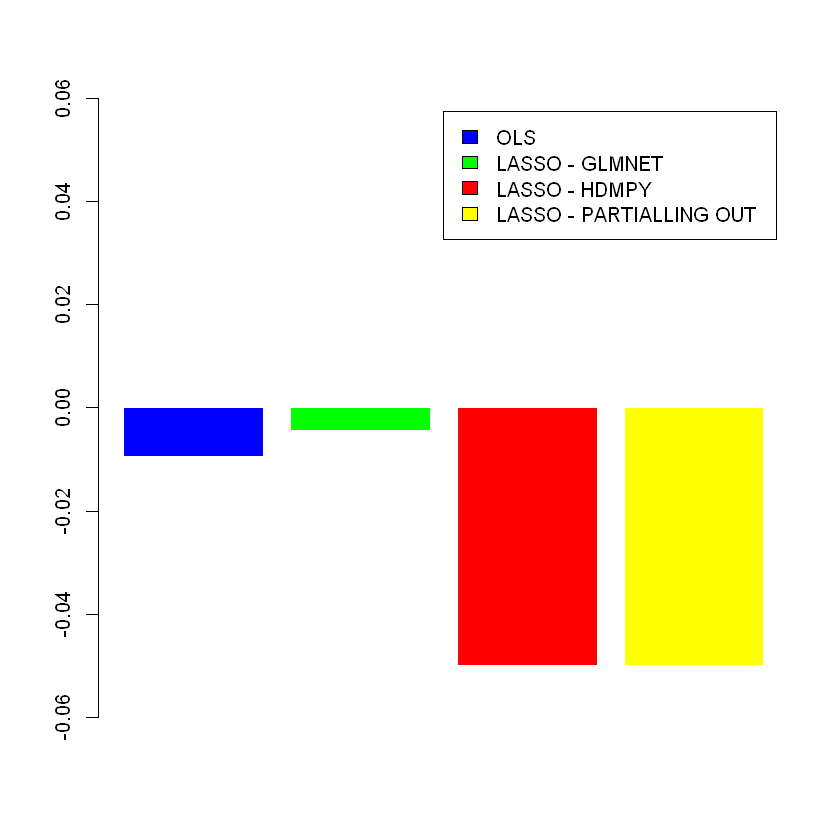

In [159]:

Base=data.frame(Metodo=c("OLS","LASSO - GLMNET","LASSO - HDMPY","LASSO - PARTIALLING OUT"), 
     Estimador=c(tab1$estimator,tab2$estimator,tab3$estimator,tab4$estimator))

barplot(Base$Estimador,col=c("blue","green","red","yellow"),ylim=c(-0.06,0.06),legend.text=Base$Metodo, border='white')